In [23]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

In [16]:
meta = pd.read_csv('../../training.csv')
test_meta = pd.read_csv('../../test.csv')

## time

In [3]:
train_times = []
for name in meta['path']:
    y, sr = librosa.load('../../' + name)
    train_times.append(len(y)/ sr)
train_times = pd.Series(train_times)
train_times.describe()

count    2700.000000
mean        0.438810
std         0.149941
min         0.143537
25%         0.342268
50%         0.420590
75%         0.512653
max         2.282766
dtype: float64

<AxesSubplot:>

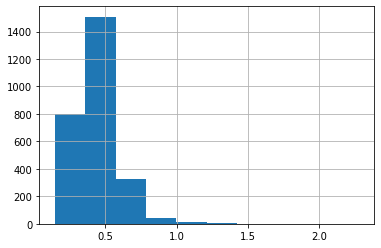

In [4]:
train_times.hist()

In [5]:
t = [item for item in train_times if item <= 1.0]
len(t)

2682

In [6]:
test_times = []
for name in test_meta['path']:
    y, sr = librosa.load('../../' + name)
    test_times.append(len(y)/ sr)
test_times = pd.Series(test_times)
test_times.describe()

count    300.000000
mean       0.425273
std        0.124639
min        0.195011
25%        0.342914
50%        0.410590
75%        0.493934
max        1.038639
dtype: float64

<AxesSubplot:>

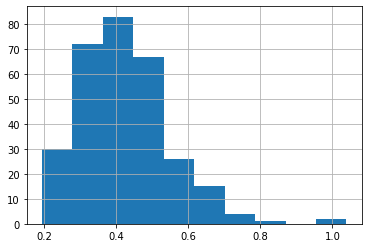

In [7]:
test_times.hist()

In [8]:
t = [item for item in test_times if item <= 1.0]
len(t)

298

In [9]:
# make new meta
# meta = pd.read_csv('../training.csv')
name_list = []
label_list = []
for i in range(len(meta)):
    if train_times[i] <= 1.0:
        name_list.append(meta['path'][i])
        label_list.append(meta['label'][i])
new_meta = pd.DataFrame(list(zip(name_list, label_list)), columns=['path', 'label'])
# new_meta.to_csv('../new_training.csv', index=False)

In [10]:
# # make new meta
# meta = pd.read_csv('../test.csv')
# name_list = []
# for i in range(len(meta)):
#     if train_times[i] <= 1.0:
#         name_list.append(meta['path'][i])
# df = pd.DataFrame(name_list, columns=['path'])
# df.to_csv('../new_test.csv', index=False)

### relation of number and audio time

In [19]:
meta['times'] = train_times
meta.head()

,path,label,times
0,dataset/train/jackson_0.wav,4,0.502902
1,dataset/train/jackson_1.wav,4,0.429252
2,dataset/train/jackson_2.wav,4,0.484898
3,dataset/train/jackson_3.wav,4,0.440272
4,dataset/train/jackson_4.wav,4,0.454512


In [20]:
meta.groupby('label').mean()

,times
label,
0,0.503607
1,0.403095
2,0.385760
3,0.402025
4,0.409257
5,0.453843
6,0.453374
7,0.461145
8,0.415019


## meta

<AxesSubplot:>

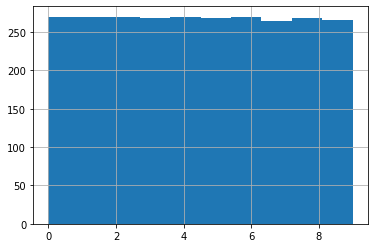

In [22]:
new_meta['label'].hist()

In [29]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

<AxesSubplot:title={'center':'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

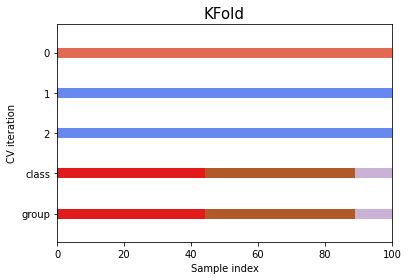

In [33]:
fig, ax = plt.subplots()
n_splits = 3
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
cv = KFold(n_splits)
idxes = [i for i in range(len(new_meta))]
X = idxes
y = new_meta['label'].values
groups = new_meta['label'].values
plot_cv_indices(cv, X, y, groups, ax, n_splits)